In [1]:
import sys
sys.path.insert(0, "/mnt/arquivos_linux/wile_C/Predictive_Maintenance_free_dataset/")
import torch
from matplotlib.pyplot import figure
from datasets import DatasetSinteticUnsupervisedLSTM

figure(figsize=(8, 6), dpi=80)

limiter = 2000

ABS_PATH = '/mnt/arquivos_linux/wile_C/Predictive_Maintenance_free_dataset'

test_dataset = DatasetSinteticUnsupervisedLSTM(dir_data=f'{ABS_PATH}/Datasets/sintetic_data/train_compressor_data.h5',
                                       context=400,
                                       stride=1)

test_loader = torch.utils.data.DataLoader(
                test_dataset, batch_size=1, shuffle=False
                )

100%|██████████████████████████████████| 4100/4100 [00:00<00:00, 1906713.21it/s]

len dataset:4100


<Figure size 640x480 with 0 Axes>

In [2]:
def union_vector_predicted_dict(data_predict:dict):
    
    x_concat = data_predict[0]
    
    del data_predict[0]
    
    keys_predicted = list(data_predict.keys())
    
    for key in keys_predicted:
        x_concat = torch.concat((x_concat, data_predict[key]), dim=1)
        
        del data_predict[key]
    
    return x_concat

In [3]:
data_predict = torch.load(f"../sintetic_generate_data_LSTM.pt")

In [4]:
data_predict[0].shape

torch.Size([1, 1, 1])

In [5]:
vet_predict = union_vector_predicted_dict(data_predict)

In [6]:
vet_predict[0,400:,0]

tensor([-0.6649, -0.5446, -0.5961,  ..., 79.6325, 79.7240, 79.7541])

## Concat Vets

In [7]:
# x_true, _ = test_loader.dataset[0]

# get_n_elements = len(test_loader.dataset)

# for i in range(1, get_n_elements):
    
#     x_second, _ = test_loader.dataset[i]
    
#     x_true = torch.concat((x_true, x_second), dim=0)
    
x_true = test_dataset.data

x_true.shape, vet_predict.shape

((4500, 1), torch.Size([1, 4500, 1]))

### First channel

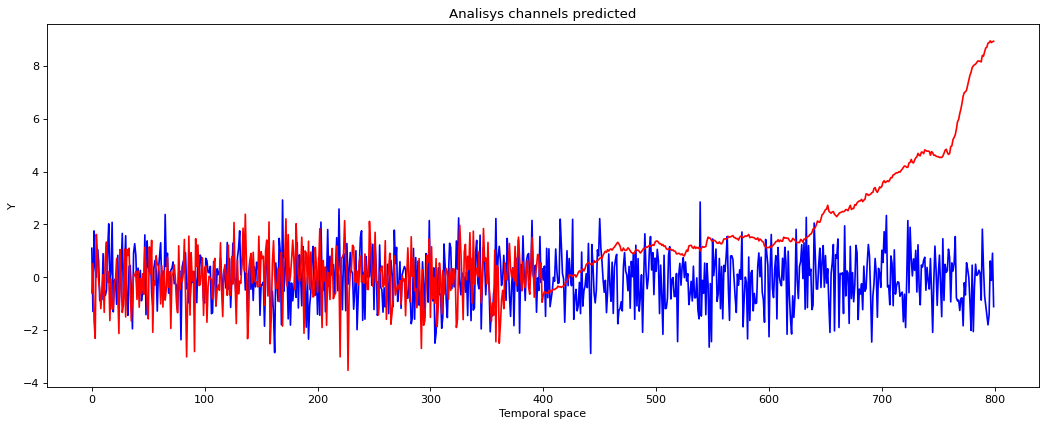

In [13]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(16, 6), dpi=80)
init_limiter = 0
limiter = init_limiter + 800

#plt.plot(data_normal_train[:limiter,0])

#fig, axs = plt.subplots(1, 2, figsize=(15, 15))

feature_channel = 0
plt.xlabel('Temporal space')
plt.ylabel('Y')
plt.title("Analisys channels predicted")
plt.plot(x_true[init_limiter:limiter, feature_channel], color='blue', label='sinal Real')
plt.plot(vet_predict[0][init_limiter:limiter, feature_channel], color='r', label='sinal previsto')
# plt.plot(x_true, color='blue', label='sinal Real')
# plt.plot(vet_predict[0], color='r', label='sinal previsto')


In [9]:
abs(x_true[init_limiter:limiter, feature_channel] - vet_predict[0][init_limiter:limiter, feature_channel].numpy())[:100]

array([1.68703019, 1.8109228 , 3.39785288, 2.73223034, 1.62308613,
       0.19069086, 0.73356284, 0.38937304, 0.31499521, 0.36120595,
       0.79875107, 0.85742685, 1.45500091, 1.82797078, 1.16240574,
       1.81934664, 1.42829242, 0.21297558, 3.27918022, 0.1253284 ,
       0.05499011, 0.03007192, 1.7360421 , 1.37552092, 0.80444911,
       1.34894943, 0.38574981, 2.99248647, 0.21432488, 0.6427807 ,
       3.07038313, 1.89288675, 2.25914388, 0.68386116, 0.94394524,
       1.17240985, 1.15778348, 0.81507413, 1.20925556, 0.60414977,
       0.36446841, 0.10719626, 0.72248707, 0.31331134, 0.27436977,
       0.6511978 , 0.10033762, 0.4663694 , 1.74812277, 2.38482811,
       1.98792726, 0.95274016, 0.73605422, 2.0078242 , 1.02554585,
       0.49409224, 0.93713727, 0.53346509, 1.76539702, 0.16934907,
       0.66568627, 2.31463078, 0.86487904, 1.35298694, 0.94788716,
       3.24032822, 0.82985813, 0.15166058, 0.21241974, 0.82520244,
       2.20263737, 0.27421887, 0.42940287, 0.71071808, 0.20610

In [10]:
type(x_true[init_limiter:limiter, feature_channel])

numpy.ndarray